In [1]:
import numpy as np
import os
import sys
from plotnine import *
import pandas as pd

sys.path.append("/home/peter/personal/CoFI/")
import cofi_core
from cofi_core import DumbDescent 
from cofi_core import Model
np.random.seed(60065)

In [2]:
OBJDIR="/home/peter/personal/CoFI/user_testing/rfc"
sys.path.append(OBJDIR)
import rfc 

In [3]:
print(rfc.cofi_init.__doc__)

cofi_init(fs0,gauss_a0,water_c0,true_model)

Wrapper for ``cofi_init``.

Parameters
----------
fs0 : input float
gauss_a0 : input float
water_c0 : input float
true_model : input rank-2 array('f') with bounds (7,3)



In [4]:
true_model = np.array([[8.370596, 3.249075, 1.7],
[17.23163, 3.001270, 1.7],
[1.9126695E-02, 2.509443, 1.7],
[19.78145, 3.562691, 1.7],
[41.73066, 4.225965, 1.7],
[14.35261, 2.963322, 1.7],
[49.92358, 4.586726, 1.7]])

rfc.cofi_init(25.0, 2.1, 0.0001, true_model)

In [5]:
print(rfc.cofi_misfit.__doc__)

misfit,value_pred,value_obs = cofi_misfit(model)

Wrapper for ``cofi_misfit``.

Parameters
----------
model : input rank-2 array('f') with bounds (7,3)

Returns
-------
misfit : float
value_pred : rank-1 array('f') with bounds (626)
value_obs : rank-1 array('f') with bounds (626)



In [6]:

noisy_model =  true_model + (np.random.random(true_model.shape)-0.5)*0.5
misfit, pred, obs = rfc.cofi_misfit(noisy_model)

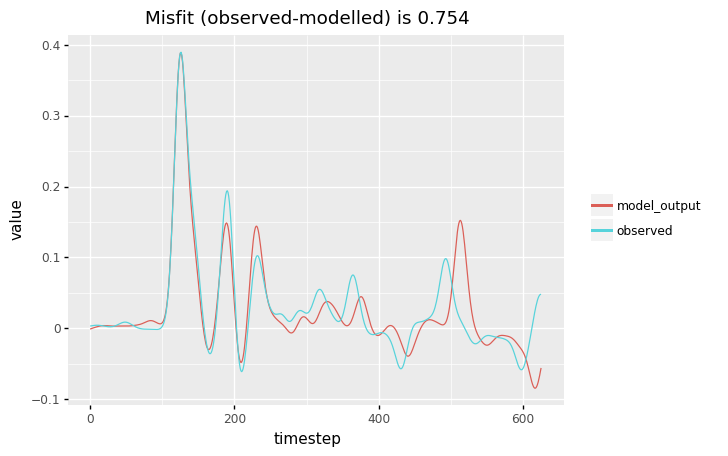

<ggplot: (8751364659197)>

In [7]:
df = pd.DataFrame(dict(timestep=range(len(pred)),model_output=pred, observed=obs))
p = ggplot(df.melt(id_vars="timestep"), aes(x="timestep",y="value",colour="variable")) + geom_line()
p = p + theme(legend_title=element_blank()) + ggtitle(f"Misfit (observed-modelled) is {misfit:0.3f}")
p

In [8]:
m=Model(earth_model=noisy_model)
desc = DumbDescent(model=m, forward=rfc.cofi_misfit, step=0.2, time=30)
res = desc.run()

0.7535800337791443
0.6993079781532288
0.5138182640075684
0.5773938298225403
0.5028629302978516
0.6248577237129211
0.3773018717765808
0.8056472539901733
0.6312711238861084
0.5739128589630127
0.48803383111953735
0.347214013338089
0.43944883346557617
0.13392089307308197
0.3195832371711731
0.20288068056106567
0.1953970491886139
0.1929001659154892
0.3210499882698059
0.38252314925193787
0.27176180481910706
0.33617886900901794
0.3496064841747284
0.28812748193740845
0.22992588579654694
0.23443371057510376
0.25250133872032166
0.30964478850364685
0.2978403568267822
0.42053261399269104
0.1725948601961136
0.37511247396469116
0.3019773066043854
0.18324469029903412
0.23882128298282623
0.22255738079547882
0.2095695436000824
0.1694599986076355
0.200514554977417
0.2725827097892761
0.34169623255729675
0.30571553111076355
0.2555273771286011
0.17976775765419006
0.15239013731479645
0.4563577175140381
0.45173412561416626
0.27887246012687683
0.17494063079357147
0.3063175678253174
0.16450676321983337
0.271796

1.1083154678344727
0.16334347426891327
0.9702122807502747
1.0622767210006714
0.2352394163608551
0.34461265802383423
0.3907672166824341
1.3152141571044922
0.22437065839767456
1.2413297891616821
1.0475249290466309
0.9921151995658875
0.2249058037996292
0.30245542526245117
0.34592151641845703
1.3992236852645874
0.2228221595287323
0.8722860813140869
0.15873226523399353
0.25176510214805603
0.21074409782886505
0.31828731298446655
0.254872590303421
0.3797265291213989
1.1887656450271606
1.0270057916641235
0.1189819723367691
0.2704906463623047
0.2988283932209015
0.2592613399028778
0.23831351101398468
0.20109447836875916
1.818374514579773
0.2901287376880646
0.2252153605222702
0.39100444316864014
0.19344665110111237
0.4317578673362732
0.30085501074790955
0.2720987796783447
0.3744267225265503
0.20713481307029724
0.16565804183483124
1.482783317565918
0.10656248778104782
0.23446762561798096
0.18022885918617249
0.3123414218425751
0.1146729439496994
0.22300539910793304
0.19013012945652008
0.24908795952

0.23448072373867035
0.6240668892860413
0.22273853421211243
0.12714862823486328
0.09496910125017166
0.1695130318403244
0.10038833320140839
0.40130823850631714
0.13610529899597168
0.2063944935798645
0.16907566785812378
0.12067809700965881
0.20409251749515533
0.11505776643753052
0.19698861241340637
0.14325320720672607
0.19227492809295654
0.20605535805225372
0.1162785142660141
0.220941424369812
0.09682554006576538
0.19910021126270294
0.1943887174129486
0.18617358803749084
0.13149242103099823
0.10376971960067749
0.22216437757015228
0.16564130783081055
0.2305389642715454
0.1222769245505333
0.2746622562408447
0.309123158454895
0.07202466577291489
0.14105263352394104
0.10606364905834198
0.16563500463962555
0.19019754230976105
0.1373637169599533
0.1600654274225235
0.27787140011787415
0.26677536964416504
0.15521951019763947
0.24706950783729553
0.25233733654022217
0.4685867428779602
0.2186509370803833
0.26143574714660645
0.17318479716777802
0.1434430629014969
0.22272039949893951
0.169445887207984

0.17923538386821747
0.15681011974811554
0.38040173053741455
0.1666949987411499
0.14449000358581543
0.16412602365016937
0.11592403054237366
0.1728498637676239
0.0630277469754219
0.14376096427440643
0.307672917842865
0.11150889098644257
0.12453531473875046
0.13463130593299866
0.21805909276008606
0.10228493809700012
0.17359398305416107
0.304202675819397
0.20328623056411743
0.20321747660636902
0.31522679328918457
0.1939818114042282
0.18077048659324646
0.1094265952706337
0.23235896229743958
0.15301480889320374
0.24490222334861755
0.2969011664390564
0.20251019299030304
0.34673845767974854
0.25343018770217896
0.16866815090179443
0.12614524364471436
0.2038625031709671
0.10681276768445969
0.33415886759757996
0.09255992621183395
0.11118737608194351
0.12261126935482025
0.18216343224048615
0.15088340640068054
0.15958091616630554
0.13239526748657227
0.14197514951229095
0.16571281850337982
0.10304398089647293
0.23150382936000824
0.3427126705646515
0.23514877259731293
0.26133862137794495
0.1386508941

0.1739165186882019
0.17914871871471405
0.21342693269252777
0.23637419939041138
0.20587290823459625
0.14859527349472046
0.08051091432571411
0.23716393113136292
0.27900123596191406
0.08633742481470108
0.3318072557449341
0.12381956726312637
0.07233580201864243
0.15510207414627075
0.12805451452732086
0.20655277371406555
0.14945191144943237
0.1973276287317276
0.1549505591392517
0.5318048000335693
0.24374958872795105
0.22286269068717957
0.11008550226688385
0.09899622946977615
0.47132423520088196
0.12133247405290604
0.1511150300502777
0.11671017855405807
0.2371867448091507
0.29416516423225403
0.18485918641090393
0.1542094200849533
0.11260341852903366
0.2229209542274475
0.11115968227386475
0.17911483347415924
0.10550472885370255
0.17655843496322632
0.15999406576156616
0.12899520993232727
0.21166552603244781
0.21848246455192566
0.12549176812171936
0.15959474444389343
0.2004416584968567
0.13983002305030823
0.3969058692455292
0.10838621854782104
0.1591557413339615
0.2278997302055359
0.27196633815

1.1772100925445557
1.6864782571792603
1.340404987335205
0.14167016744613647
0.0516437366604805
0.2798435389995575
0.23315797746181488
0.1293479949235916
0.08301419019699097
1.0872793197631836
0.2249893993139267
1.2289042472839355
0.0927555039525032
0.20463475584983826
0.27678048610687256
0.13191363215446472
0.9520313739776611
0.153404101729393
1.9084962606430054
1.6402292251586914
1.3430845737457275
1.3502329587936401
1.486061930656433
0.10408550500869751
0.09802787750959396
1.3042699098587036
1.3120590448379517
0.1196385994553566
1.4446275234222412
0.10221929848194122
0.08777181059122086
1.4129469394683838
0.29206979274749756
0.12914247810840607
0.21712914109230042
0.1376025229692459
0.3587421774864197
0.14168806374073029
0.14426234364509583
0.2787691652774811
0.1813012957572937
0.9507147073745728
0.23793132603168488
0.13435937464237213
0.20273219048976898
0.08057624846696854
1.476810336112976
1.2243585586547852
0.1791694462299347
0.12550483644008636
0.1366412192583084
0.0869499891996

1.4532707929611206
0.1904631406068802
0.05974062532186508
1.0900287628173828
0.14123903214931488
0.21897463500499725
1.3517701625823975
0.21506744623184204
0.11982988566160202
0.1357559859752655
0.08656526356935501
0.12841230630874634
0.14974746108055115
0.2155114859342575
1.1907927989959717
0.07402648776769638
0.08249266445636749
1.481014370918274
0.13165178894996643
0.3015373647212982
0.16690701246261597
0.21098338067531586
0.09536301344633102
0.19095730781555176
0.18246133625507355
0.1065681204199791
0.11979199945926666
0.10336534678936005
1.7082220315933228
1.2908741235733032
0.14538322389125824
0.11220348626375198
0.11970621347427368
1.4177228212356567
0.14724087715148926
0.30525290966033936
0.13969750702381134
0.14920738339424133
0.19705115258693695
0.08340288698673248
0.09961461275815964
0.17757968604564667
0.30576854944229126
1.788340449333191
0.15195371210575104
0.1637330949306488
0.11267213523387909
0.09784713387489319
0.11881589144468307
0.18559324741363525
0.295411407947540

1.092388391494751
0.3167753219604492
0.13833773136138916
0.16277660429477692
1.123326301574707
0.13842546939849854
1.324168086051941
0.13152912259101868
1.6257790327072144
1.2129112482070923
0.172346830368042
0.1456824392080307
0.0941050797700882
1.2628791332244873
0.08326458930969238
0.2946220338344574
0.11121755093336105
1.3125895261764526
1.18010413646698
0.10665956884622574
0.18911772966384888
1.3825418949127197
0.15254077315330505
0.11848550289869308
0.18090397119522095
0.19433996081352234
1.4109232425689697
0.15727302432060242
0.13651420176029205
0.2901277542114258
0.1029386892914772
0.21568113565444946
0.17846673727035522
1.5365949869155884
0.09002027660608292
0.20189335942268372
0.14553408324718475
0.1978885680437088
0.9481417536735535
0.09209628403186798
0.0670187845826149
0.23024602234363556
1.1318597793579102
1.1863995790481567
0.08800534158945084
0.11898651719093323
1.5212960243225098
0.07647235691547394
0.2618967890739441
0.11942318081855774
0.16032391786575317
0.188361391

0.12211398035287857
0.2691951096057892
0.14124590158462524
0.04165768250823021
0.20811276137828827
0.13014273345470428
0.30124935507774353
1.1129889488220215
0.2048145830631256
0.2938935160636902
0.1959669589996338
0.28949111700057983
0.08300841599702835
1.6179879903793335
0.22069749236106873
0.25232115387916565
0.21913588047027588
1.7673412561416626
0.11131146550178528
1.031510591506958
0.27951711416244507
1.0860188007354736
0.1422266662120819
1.3296599388122559
0.2477666586637497
0.2730890214443207
0.13299912214279175
0.09079409390687943
0.08845151215791702
0.2596454322338104
0.23301370441913605
1.304829716682434
0.09212066233158112
0.1514820158481598
0.17404146492481232
1.6799228191375732
1.0781176090240479
0.1115456074476242
0.1897246092557907
0.19114333391189575
0.16629919409751892
1.498400330543518
1.6606553792953491
0.11527460813522339
0.1671895533800125
0.23852227628231049
1.4115159511566162
0.13164709508419037
0.08014823496341705
0.07648846507072449
0.08577573299407959
0.25739

1.064182996749878
1.505679726600647
0.08476940542459488
0.08371446281671524
0.18021753430366516
0.9281686544418335
0.10991913825273514
0.2560255527496338
0.15378698706626892
0.1795843243598938
0.14298899471759796
0.11205088347196579
1.3747502565383911
0.27786701917648315
0.18218913674354553
0.14969412982463837
0.1219756007194519
1.0066932439804077
0.18714696168899536
0.10615872591733932
0.12922348082065582
0.14777854084968567
0.1195259615778923
0.15134648978710175
0.08363861590623856
0.11805691570043564
0.20119833946228027
0.21484272181987762
1.482872724533081
0.13138116896152496
0.24189002811908722
0.17270353436470032
0.1188604012131691
0.1699638068675995
0.12188170105218887
0.17649993300437927
0.18397961556911469
1.1617634296417236
1.1327235698699951
0.171667218208313
0.23289118707180023
1.2775925397872925
0.2074335664510727
1.5472767353057861
0.2220093309879303
0.2134995460510254
1.7803541421890259
0.17688339948654175
0.15481384098529816
1.2238812446594238
0.13301125168800354
0.1486

0.2743019461631775
1.302498459815979
0.14463357627391815
0.15517106652259827
0.12242849916219711
0.07743250578641891
0.18094265460968018
0.2610498368740082
0.1589224487543106
0.21197879314422607
0.15791289508342743
0.19955560564994812
0.13093701004981995
0.10948455333709717
0.3585151433944702
1.7127635478973389
0.3469918966293335
0.21896418929100037
0.1794213205575943
0.3386688828468323
0.11064472049474716
0.24539874494075775
0.1150694191455841
0.09013726562261581
1.25515878200531
0.12785524129867554
0.12076179683208466
0.18893848359584808
0.2781006991863251
0.11424475163221359
0.13724343478679657
0.243122860789299
1.6697180271148682
0.1956343650817871
0.15925092995166779
0.16066956520080566
1.2622954845428467
1.3184844255447388
0.17084404826164246
0.07153433561325073
0.10746463388204575
0.13780289888381958
1.2110590934753418
0.12982802093029022
1.293687343597412
0.106331467628479
0.10370336472988129
0.10832727700471878
0.2205224335193634
0.36595696210861206
0.10991367697715759
0.13235

0.17937123775482178
1.51561439037323
0.10867326706647873
0.08096002787351608
1.7638428211212158
0.19048276543617249
0.16331782937049866
0.09036152809858322
0.04250242933630943
0.08356659859418869
1.88768470287323
1.2878873348236084
0.1429087221622467
0.19217413663864136
1.4389948844909668
1.459558367729187
0.2084427922964096
0.25448140501976013
0.0867108404636383
0.15159769356250763
0.12506277859210968
0.18482916057109833
0.21766090393066406
1.3236032724380493
0.13981874287128448
0.1821291744709015
1.4781293869018555
0.14636339247226715
1.3902641534805298
0.19188299775123596
0.20053744316101074
0.16789650917053223
0.13863505423069
0.22500309348106384
1.3619825839996338
0.15659090876579285
0.19239825010299683
1.23354172706604
0.08898632228374481
0.13634616136550903
0.18911752104759216
0.1265491098165512
0.19085907936096191
0.11858160048723221
1.709027647972107
1.1101330518722534
0.08375052362680435
0.11257974803447723
0.14988556504249573
1.4464517831802368
0.19230611622333527
1.78474438

0.07108011841773987
0.12688562273979187
0.27887728810310364
0.148686021566391
1.2437196969985962
1.1038436889648438
1.6059244871139526
0.152284637093544
0.08411766588687897
1.1467602252960205
0.1880791336297989
0.0770593211054802
0.07120143622159958
1.2100255489349365
0.13199803233146667
0.05744674429297447
0.0725439190864563
1.7818982601165771
0.10657358914613724
0.229824498295784
0.1716509610414505
0.2115992158651352
0.12587742507457733
0.20130133628845215
0.27033570408821106
0.09691741317510605
0.17006468772888184
0.11803896725177765
0.19313472509384155
1.4171016216278076
0.3343346416950226
0.14275477826595306
0.28845763206481934
1.4147156476974487
0.2064732313156128
1.448103427886963
0.12783727049827576
0.17450881004333496
1.7601898908615112
1.5449413061141968
0.0956510379910469
0.11879634112119675
0.1311483383178711
0.14150871336460114
1.7900524139404297
0.08203844726085663
1.5452145338058472
0.08641289174556732
0.1636989712715149
0.057309605181217194
0.08006701618432999
0.0877045

0.14291788637638092
0.1350966989994049
0.12067520618438721
0.1526171863079071
1.3335869312286377
0.18826095759868622
1.1735931634902954
0.3163531720638275
1.1842825412750244
1.2050304412841797
0.0786941722035408
0.1440037190914154
1.4418762922286987
1.377049207687378
1.0520200729370117
1.2195600271224976
0.16040624678134918
0.11183086782693863
0.1475674957036972
0.09525328874588013
0.30600374937057495
0.15705393254756927
0.14452417194843292
0.08239161223173141
1.2993977069854736
0.25090816617012024
0.14948678016662598
0.21021290123462677
0.2953486442565918
0.10831962525844574
0.0794692412018776
0.23275984823703766
0.13502062857151031
0.1576637625694275
0.14940887689590454
1.285903811454773
0.11537429690361023
1.1740813255310059
0.06643608212471008
0.1541578322649002
0.05592156574130058
0.37362200021743774
0.1893802434206009
1.2189780473709106
1.2461061477661133
1.4895262718200684
1.233309268951416
1.0682905912399292
0.158820241689682
0.21722295880317688
0.29180005192756653
0.0825419053

1.4563575983047485
0.14788228273391724
0.047737278044223785
1.192565679550171
0.16156186163425446
1.3325828313827515
0.2276715487241745
0.18610715866088867
1.1175580024719238
0.9868305325508118
1.2840200662612915
0.1393316090106964
0.13897360861301422
1.54286527633667
0.17014001309871674
1.0022430419921875
0.14708076417446136
0.18041735887527466
0.06555482745170593
0.24556812644004822
0.13121086359024048
0.3348701298236847
0.16700299084186554
0.06754162907600403
0.19740942120552063
0.06734882295131683
0.08738421648740768
1.1613526344299316
1.618067741394043
0.1346195489168167
0.10631179809570312
0.17921341955661774
0.08409126102924347
1.4280781745910645
1.1342535018920898
0.2594650089740753
1.5798372030258179
0.35292160511016846
1.0570614337921143
0.1808892786502838
0.21749930083751678
0.12837104499340057
0.1148362085223198
0.206435889005661
0.27079564332962036
0.19829240441322327
1.072031855583191
0.14287738502025604
0.07915638387203217
0.23326575756072998
0.1104341372847557
1.2967075

0.19245192408561707
0.2633969485759735
0.16145579516887665
0.08865366876125336
1.32150137424469
0.157535120844841
0.09751266986131668
1.4809024333953857
0.12093211710453033
0.14624691009521484
0.10811697691679001
0.07490944117307663
0.09895778447389603
0.23181696236133575
0.10820960998535156
0.17787577211856842
0.1101163998246193
0.1401541829109192
1.2860350608825684
0.17762404680252075
0.13985419273376465
0.15975765883922577
0.08095894008874893
0.2022792100906372
1.344691514968872
0.15562736988067627
1.1941124200820923
1.3767578601837158
1.5102180242538452
0.07988420128822327
0.08736387640237808
0.1711435616016388
0.16221584379673004
0.08551156520843506
0.16515867412090302
0.11684981733560562
0.05628414452075958
0.12191268801689148
0.31923332810401917
0.0990329310297966
1.6162375211715698
0.1865839660167694
1.4636266231536865
0.08389454334974289
0.07620665431022644
0.3035445809364319
0.17761440575122833
0.27406296133995056
0.10167019069194794
0.11353147774934769
1.2691289186477661
0.2

1.1768412590026855
1.417939305305481
0.10141599178314209
0.16710950434207916
0.16785193979740143
0.3094778060913086
0.12907186150550842
0.18076585233211517
0.19465529918670654
0.15158750116825104
0.1424236297607422
0.23504525423049927
0.14235812425613403
0.12928040325641632
0.20055730640888214
0.1983259618282318
0.20174410939216614
0.14902879297733307
0.14261765778064728
1.0512967109680176
1.571940541267395
1.086374044418335
1.2841686010360718
0.14762519299983978
0.11439782381057739
0.4963105618953705
0.10180870443582535
0.2787119746208191
0.11299536377191544
1.6736207008361816
0.09381067007780075
0.11144012212753296
1.3910105228424072
0.06958061456680298
1.3186129331588745
0.2312108427286148
1.1732674837112427
1.4723007678985596
0.08602136373519897
0.11740599572658539
0.06696212291717529
1.479793667793274
1.451615571975708
0.11825302243232727
1.0564360618591309
1.0277892351150513
1.4405505657196045
0.1856081634759903
0.21328933537006378
1.1510664224624634
0.20774812996387482
1.1454536

0.07451595366001129
0.11113139986991882
0.14236915111541748
0.3584167957305908
1.3461189270019531
0.1774270087480545
1.2431771755218506
0.1376817375421524
0.30338385701179504
0.11694952100515366
0.05828927084803581
0.24730049073696136
0.20524510741233826
0.9893903136253357
0.1579277366399765
1.270979881286621
0.2422722727060318
1.7223474979400635
1.4594532251358032
1.6897227764129639
1.6213740110397339
0.11448729038238525
0.06855004280805588
0.13049353659152985
1.3282729387283325
1.4800375699996948
0.17016932368278503
0.32202276587486267
1.6799144744873047
0.23282894492149353
0.08505561202764511
0.15960639715194702
0.22002477943897247
0.20028017461299896
0.09590858221054077
1.3819340467453003
1.2668952941894531
0.2244974970817566
0.18053346872329712
0.16352878510951996
0.3298942446708679
0.4171522855758667
1.0677491426467896
0.18292522430419922
1.122619867324829
0.09466926753520966
1.1176315546035767
0.3844052255153656
0.1524377465248108
1.1323246955871582
0.13253167271614075
0.1141118

0.1468748152256012
0.26481518149375916
0.12600378692150116
1.862747311592102
0.1943000853061676
0.2403879463672638
0.27917319536209106
0.09107349067926407
0.13847759366035461
1.2025896310806274
0.12651610374450684
0.2726982533931732
0.16354584693908691
1.7886719703674316
0.39135465025901794
0.17830239236354828
0.22490988671779633
1.6849422454833984
0.15399469435214996
0.07669943571090698
0.11739721894264221
0.13726449012756348
0.11639164388179779
0.11337221413850784
1.857930302619934
0.1392161101102829
0.0719606950879097
0.17493832111358643
0.13760441541671753
0.18021902441978455
1.104562759399414
1.4569847583770752
0.09950463473796844
1.226718544960022
1.1695950031280518
0.08372701704502106
0.06605760008096695
1.1759850978851318
1.5921627283096313
1.6858676671981812
0.14309100806713104
0.18842963874340057
0.24479889869689941
1.2246735095977783
1.4956648349761963
0.16503499448299408
1.5300973653793335
0.10681883245706558
1.3218724727630615
0.3560527265071869
0.9913342595100403
0.073143

0.10450401157140732
0.19473232328891754
1.3348923921585083
0.19338151812553406
0.1270131915807724
0.16110897064208984
0.23992745578289032
0.1473858505487442
0.11526795476675034
0.05911259725689888
0.1556086540222168
1.4643808603286743
0.2233138382434845
0.0827261209487915
0.1649298071861267
0.09486258774995804
1.0605679750442505
1.6907145977020264
0.25607720017433167
0.22756944596767426
1.7789829969406128
0.22649388015270233
0.18580985069274902
1.392236351966858
1.4198975563049316
1.5774763822555542
0.12233592569828033
1.680303931236267
1.6252562999725342
1.3311877250671387
0.045122724026441574
0.2776806652545929
0.07575922459363937
1.3830665349960327
0.15203264355659485
0.1206367164850235
0.25040966272354126
1.6678438186645508
0.4603845477104187
0.11793957650661469
0.3374953866004944
0.07168152183294296
0.4402133524417877
1.167198896408081
0.10013016313314438
1.5815377235412598
1.3499908447265625
0.10681755095720291
0.1558452695608139
0.18668778240680695
1.1647825241088867
0.103477932

0.206963911652565
1.0602128505706787
0.09463819861412048
1.2848918437957764
0.19083361327648163
0.0977187529206276
1.7480982542037964
1.2642359733581543
0.20417028665542603
0.2849895656108856
0.20785404741764069
0.17163459956645966
0.13014623522758484
0.19736889004707336
0.1588968187570572
0.13848310708999634
0.15879298746585846
0.24175769090652466
1.4143332242965698
0.08889759331941605
0.132080540060997
0.19147759675979614
0.31388425827026367
0.11252044886350632
0.13086745142936707
0.08674328029155731
0.3290616571903229
0.19912809133529663
0.17728230357170105
0.20770540833473206
0.19227762520313263
0.12275338917970657
0.12822993099689484
0.19892418384552002
0.1042502373456955
1.1832382678985596
0.17441345751285553
0.1685556173324585
0.10521519184112549
1.150161623954773
0.3317904770374298
0.09453568607568741
0.17140953242778778
0.11094881594181061
0.23583251237869263
0.16232307255268097
0.09802541136741638
0.21088580787181854
0.1488400101661682
0.19480176270008087
0.04607722535729408


0.11298662424087524
0.1490139216184616
0.1765565425157547
1.1861236095428467
1.7538405656814575
1.5469739437103271
1.2630842924118042
0.16615067422389984
0.11004596203565598
0.07980789989233017
0.12841305136680603
0.25412845611572266
1.0788941383361816
0.24544116854667664
0.15303832292556763
0.24981485307216644
0.19444848597049713
0.16247469186782837
1.4317792654037476
0.11585526913404465
0.12809671461582184
0.14607493579387665
0.1104450672864914
0.09979590028524399
0.061194099485874176
0.17726565897464752
0.10874629020690918
1.165260910987854
0.21807923913002014
0.20666956901550293
0.16466949880123138
0.3340005576610565
0.07956567406654358
0.12443672120571136
0.10986977815628052
1.6170902252197266
0.20608355104923248
0.08368037641048431
0.07287835329771042
0.17308774590492249
1.6347706317901611
1.7115089893341064
0.17088459432125092
1.1434701681137085
0.26122578978538513
0.20804710686206818
1.505515217781067
0.17333798110485077
0.10568628460168839
0.11259012669324875
0.191595450043678

In [9]:
model, misfit, pred, obs = res

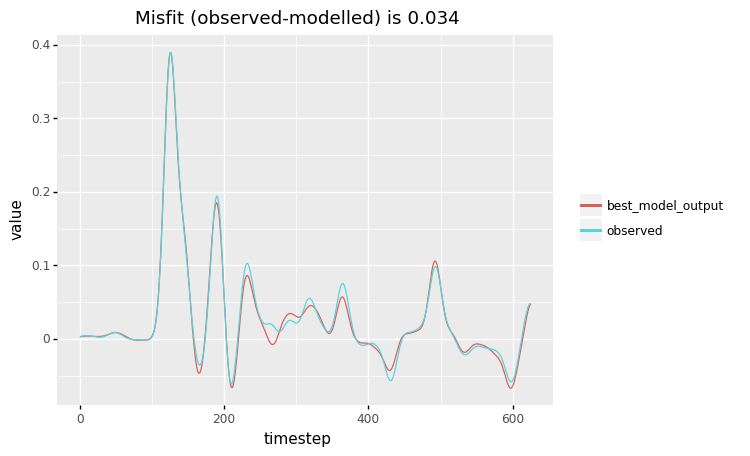

<ggplot: (8751351754364)>

In [10]:
df = pd.DataFrame(dict(timestep=range(len(pred)),best_model_output=pred, observed=obs))
p = ggplot(df.melt(id_vars="timestep"), aes(x="timestep",y="value",colour="variable")) + geom_line()
p = p + theme(legend_title=element_blank()) + ggtitle(f"Misfit (observed-modelled) is {misfit:0.3f}")
p